In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as s
import seaborn as sns

In [2]:
training_data = pd.DataFrame(data={"x":np.random.normal(loc=65,scale=5,size=1000)})

In [3]:
training_data

,x
0,74.943257
1,66.961104
2,70.270951
3,60.178049
4,64.687645
...,...
995,58.134949
996,52.020308
997,69.481737
998,58.958656


(array([  1.,   1.,   3.,  10.,  17.,  28.,  40.,  67.,  97., 116., 134.,
        113., 121.,  92.,  56.,  42.,  35.,  17.,   7.,   3.]),
 array([47.57333593, 49.15737218, 50.74140844, 52.32544469, 53.90948094,
        55.49351719, 57.07755344, 58.66158969, 60.24562594, 61.82966219,
        63.41369845, 64.9977347 , 66.58177095, 68.1658072 , 69.74984345,
        71.3338797 , 72.91791595, 74.50195221, 76.08598846, 77.67002471,
        79.25406096]),
 <BarContainer object of 20 artists>)

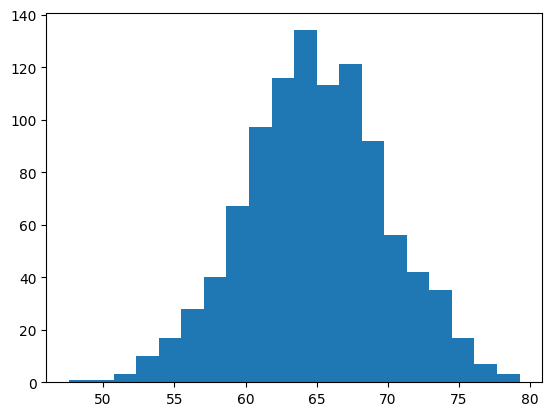

In [4]:
plt.hist(training_data, bins=20)

In [5]:
mu_values = np.linspace(63, 67, 200)
sigma_values = np.linspace(4, 6, 200)
mu_grid, sigma_grid = np.meshgrid(mu_values, sigma_values)

In [6]:
nll_values = np.zeros_like(mu_grid)

In [7]:
def gaussian_nll(mu,sigma):

    log_pdf = s.norm.logpdf(training_data,mu,sigma)
    return -np.mean(log_pdf)

In [8]:
for i in range(mu_grid.shape[0]):
    for j in range(mu_grid.shape[1]):
        nll_values[i, j] = gaussian_nll(mu_grid[i, j], sigma_grid[i, j])

In [ ]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(mu_grid, sigma_grid, nll_values, cmap='viridis', edgecolor='none')
ax.set_xlabel('Mean (mu)')
ax.set_ylabel('Standard Deviation (sigma)')
ax.set_zlabel('Negative Log Likelihood (NLL)')
ax.set_title('3D Plot of Negative Log Likelihood Function (Convex Surface)')

# Adjusting the view angle to better visualize the convexity
ax.view_init(elev=45, azim=225)

plt.show()

In [ ]:
def del_by_del_gaussian_nll(mu_initial,sigma_initial):

    del_by_del_mu = -np.mean(training_data - mu_initial)/sigma_initial**2
    del_by_del_sigma = (1/sigma_initial) - np.mean(training_data - mu_initial)**2/sigma_initial**3

    return [del_by_del_mu,del_by_del_sigma]

In [ ]:
epsilon = 10**(-2)
epoch_counter = 0
mu_initial = 5
sigma_initial = 1
tol = 10**(-6)

while True:

    initial_gradients = del_by_del_gaussian_nll(mu_initial,sigma_initial)

    mu_final = mu_initial - (epsilon * initial_gradients[0])
    sigma_final = sigma_initial - (epsilon * initial_gradients[1])

    nll_initial_value = gaussian_nll(mu_initial,sigma_initial)
    nll_final_value = gaussian_nll(mu_final,sigma_final)

    if abs(nll_initial_value - nll_final_value) < tol:
        break

    epoch_counter += 1

    mu_initial = mu_final
    sigma_initial = sigma_final

    print("Epoch # {}, NLL Value = {}".format(epoch_counter,nll_initial_value))

In [ ]:
mu_final

In [ ]:
sigma_final

In [ ]:
sns.distplot(a=training_data["x"],bins=10,fit=s.norm,kde=False)

In [ ]:
def del_by_del_rayleigh_nll(sigma_initial):

    del_by_del_sigma = -np.mean((-2)/sigma_initial + training_data**2/sigma_initial**3)

    return del_by_del_sigma

In [ ]:
def rayleigh_nll(sigma):

    log_pdf = -np.mean(s.rayleigh.logpdf(training_data,sigma))

    return log_pdf

In [ ]:
epsilon = 10**(-2)
epoch_counter = 0
sigma_initial = 1
tol = 10**(-6)

while True:

    initial_gradients = del_by_del_rayleigh_nll(sigma_initial)

    sigma_final = sigma_initial - (epsilon * initial_gradients)

    nll_initial_value = rayleigh_nll(sigma_initial)
    nll_final_value = rayleigh_nll(sigma_final)

    if abs(nll_initial_value - nll_final_value) < tol:
        break

    epoch_counter += 1
    sigma_initial = sigma_final

    print("Epoch # {}, NLL Value = {}".format(epoch_counter,nll_initial_value))